## Convolutional Neural Network in keras - Example-1

In [17]:
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline


### pip install --upgrade tensorflow==1.7

In [2]:
batch_size = 128
num_classes = 10
epochs = 128

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


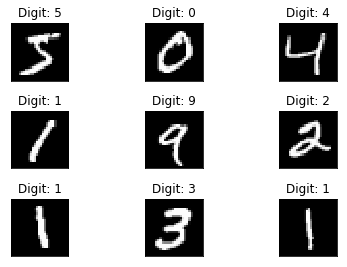

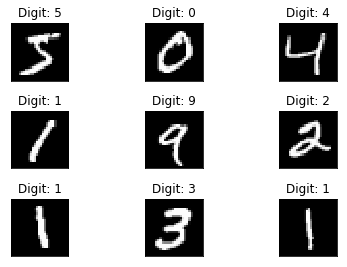

In [3]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

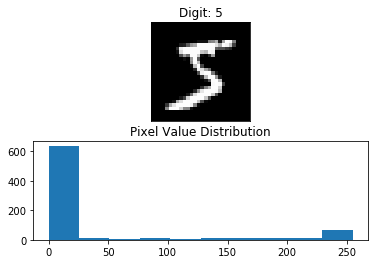

In [4]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
#fig

In [6]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [8]:
# one-hot encoding using keras' numpy-related utilities
num_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [9]:
num_epoch=10
batch_size=128

In [22]:
# building a linear stack of layers with the sequential model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))

model.add(Activation('softmax'))

In [13]:
# building a linear stack of layers with the sequential model
#model = Sequential()
#model.add(Conv2D(32, kernel_size=(3, 3),
 #                activation='relu',
  #               input_shape=input_shape))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))


In [23]:
# compiling the sequential model
opt = optimizers.Adam()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [24]:
hist = model.fit(X_train,Y_train,batch_size=batch_size, validation_data=(X_test,Y_test),epochs=num_epoch)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1676 - acc: 0.9502 - val_loss: 0.0473 - val_acc: 0.9830
Epoch 2/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0497 - acc: 0.9850 - val_loss: 0.0398 - val_acc: 0.9872
Epoch 3/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0332 - acc: 0.9898 - val_loss: 0.0280 - val_acc: 0.9904
Epoch 4/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0264 - acc: 0.9915 - val_loss: 0.0300 - val_acc: 0.9908
Epoch 5/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0200 - acc: 0.9938 - val_loss: 0.0273 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0160 - acc: 0.9948 - val_loss: 0.0267 - val_acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0122 - acc: 0.9960 - val_loss: 0.0268 - val_acc

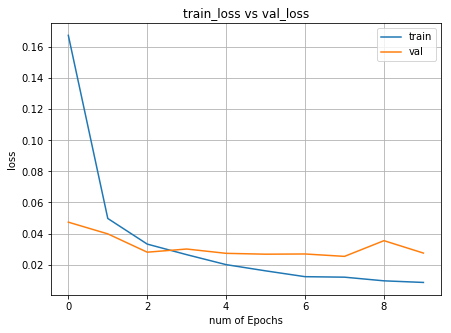

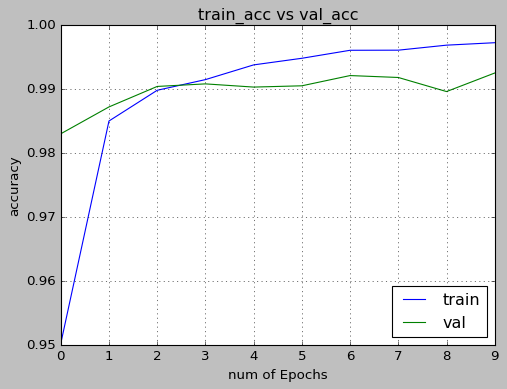

In [25]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# to save figure
plt.savefig('loss_curve_cnn_ex-1')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# to save figure
plt.savefig('acc_curve_cnn_ex-1')

In [26]:
score = model.evaluate(X_test, Y_test)
print (score)
print ('loss:', score[0])
print ('acc: ', str(score[1]*100) + '%')

10000/10000 [==============================] - 5s 499us/step
[0.02742396915723084, 0.9925]
loss: 0.02742396915723084
acc:  99.25%


In [27]:
# Predict output probability
model.predict(X_test[10:11])

array([[1.0000000e+00, 1.0399823e-15, 4.8737464e-10, 3.3890933e-14,
        2.9364135e-14, 4.7812662e-14, 7.5299257e-14, 1.0738037e-11,
        4.1124214e-13, 5.5423431e-08]], dtype=float32)

In [28]:
Y_test[10:11]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
model.predict_classes(X_test[10:15])

array([0, 6, 9, 0, 1], dtype=int64)

In [30]:
from keras.models import load_model

In [31]:
model.save('cnn_model_ex-1.h5')


In [32]:
loaded_model=load_model('cnn_model_ex-1.h5')

In [58]:
loaded_model.predict_classes(X_test[10:15])

array([0, 6, 9, 0, 1], dtype=int64)

In [34]:
# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
__________

In [35]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 28, 28, 1),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_10',
   'padding': 'valid',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu',
   'name': 'activation_13',
   'trainable': True}},
 {'class_name': 'MaxPooling2D',
  'config': {'data_format': 'channels_last',
   'name': 'max_pooling2d_5',
   'padding': 'valid',
   'pool_size': (2, 2),
 

In [36]:
len(model.layers)

12

In [37]:
model.layers[0].input_shape

(None, 28, 28, 1)

In [38]:
model.layers[0].output_shape

(None, 26, 26, 32)

In [39]:
model.layers[0].get_weights()

[array([[[[-2.41300762e-01,  8.89142826e-02,  2.83167209e-03,
            7.56571963e-02,  1.05703473e-01,  1.36086851e-01,
            2.61659294e-01,  4.30185832e-02,  2.62813317e-03,
           -1.35125250e-01, -8.20149928e-02, -8.30134079e-02,
            8.47152174e-02,  7.97852203e-02,  1.65706933e-01,
           -4.77423426e-03,  9.56787094e-02, -1.29890114e-01,
            1.23197101e-01,  3.30742635e-02,  1.17811538e-01,
            1.95592865e-01,  6.73579052e-02,  1.02743976e-01,
           -1.01155393e-01,  1.51235580e-01, -3.75382423e-01,
            7.49803707e-02, -2.52791941e-01, -8.76637399e-02,
           -9.50155556e-02, -1.40543692e-02]],
 
         [[-2.01167211e-01,  1.29260197e-01,  1.59819365e-01,
            1.44219458e-01,  1.87830105e-01,  9.34177171e-03,
            2.80586183e-01, -1.61236838e-01, -2.07423761e-01,
            2.36075133e-01,  1.08480066e-01,  8.19690004e-02,
           -2.36219168e-02, -7.87067693e-03, -2.13927552e-02,
            6.8112023

In [40]:
wt = model.layers[0].get_weights()
#wt.shape
weights = wt[0]
bias = wt[1]
print ('weights_shape: ',wt[0].shape)
print ('bias_shape: ',wt[1].shape)

weights_shape:  (3, 3, 1, 32)
bias_shape:  (32,)


In [41]:
model.layers[0].trainable

True

### Visualizing intermediate Layers

In [42]:
def get_featuremaps(model, layer_idx, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations

test_image_shape:  (1, 28, 28, 1)
(1, 1, 11, 11, 64)
(11, 11, 64)


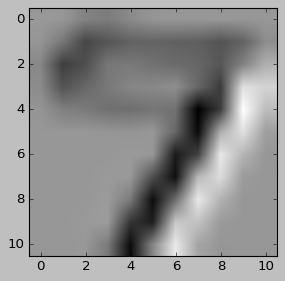

In [45]:

layer_num=3
filter_num=0
test_image = X_test[0:1]
print ('test_image_shape: ',test_image.shape)
activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

fig=plt.figure(figsize=(4,4))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')



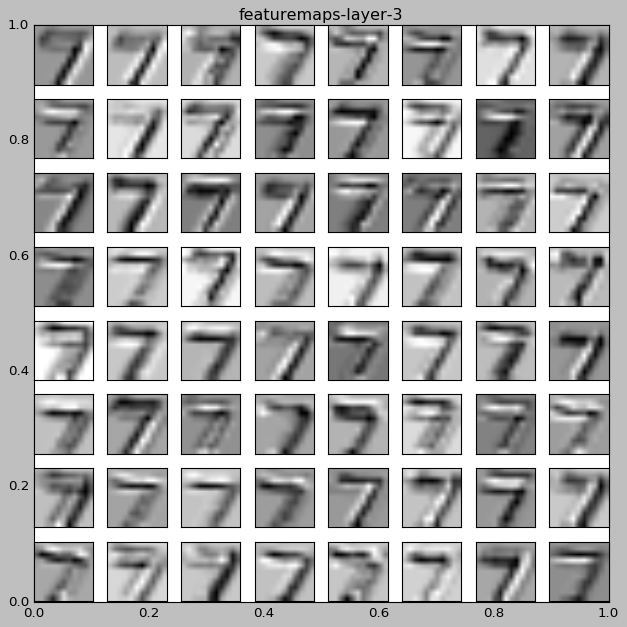

In [46]:
num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(8,8))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(feature_maps[:,:,i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

### Confusion Matrix

In [65]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(0)', 'class 1(1)', 'class 2(2)','class 3(3)','class 4(4)','class 5(5)','class 6(6)'
                ,'class 7(7)','class 8(8)','class 9(9)']

print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

             precision    recall  f1-score   support

 class 0(0)       1.00      1.00      1.00       980
 class 1(1)       1.00      1.00      1.00      1135
 class 2(2)       0.98      1.00      0.99      1032
 class 3(3)       0.99      0.99      0.99      1010
 class 4(4)       0.99      0.99      0.99       982
 class 5(5)       0.99      0.99      0.99       892
 class 6(6)       0.99      0.99      0.99       958
 class 7(7)       1.00      0.99      0.99      1028
 class 8(8)       0.99      1.00      0.99       974
 class 9(9)       0.99      0.99      0.99      1009

avg / total       0.99      0.99      0.99     10000

[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1132    0    1    0    1    0    0    1    0]
 [   1    0 1028    1    0    0    0    2    0    0]
 [   0    0    2 1004    0    2    0    0    2    0]
 [   0    0    2    0  973    0    4    0    2    1]
 [   1    0    1    4    0  882    1    0    1    2]
 [   2    2    0    0    2    1  950    0  

In [62]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1132    0    1    0    1    0    0    1    0]
 [   1    0 1028    1    0    0    0    2    0    0]
 [   0    0    2 1004    0    2    0    0    2    0]
 [   0    0    2    0  973    0    4    0    2    1]
 [   1    0    1    4    0  882    1    0    1    2]
 [   2    2    0    0    2    1  950    0    1    0]
 [   0    2    9    0    0    1    0 1013    1    2]
 [   0    0    2    0    0    0    0    0  970    2]
 [   0    0    1    1    5    2    0    2    2  996]]


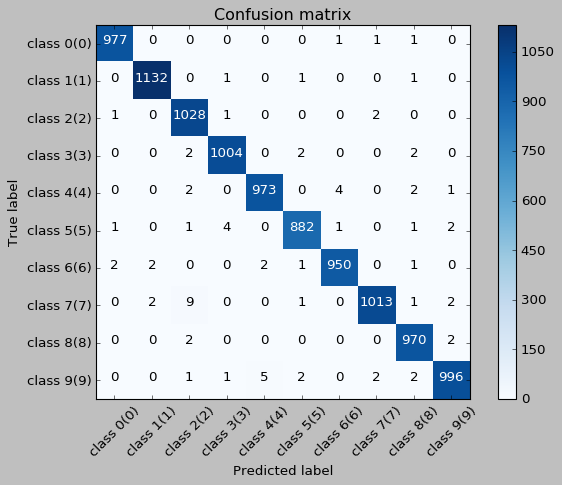

In [63]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()